In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
# mediapipe pose class를 초기화 한다.
mp_pose = mp.solutions.pose
 
# Setting up the Pose function.
# pose detect function에 image detect=True, 최소감지신뢰도 = 0.3, 모델 복잡도 =2를 준다.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
 
# Initializing mediapipe drawing class, useful for annotation.
# mediapipe의 drawing class를 초기화한다.
mp_drawing = mp.solutions.drawing_utils

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


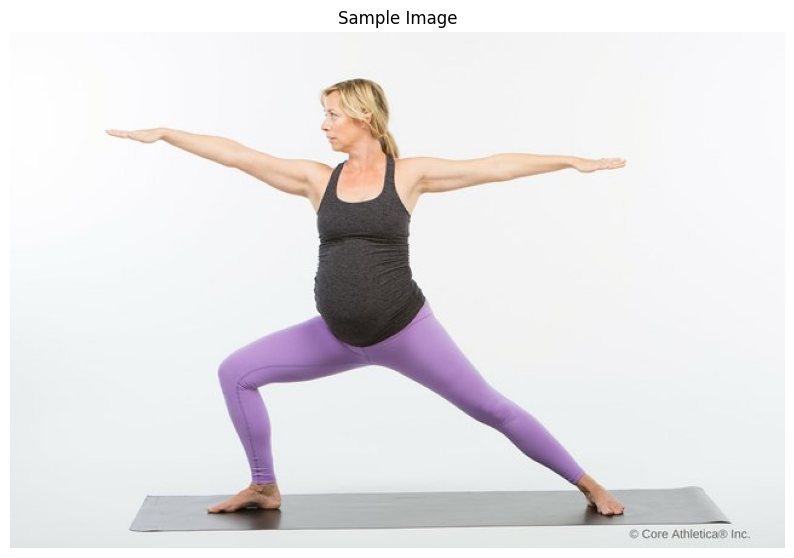

In [3]:
# 이미지 읽어오기
# 샘플 이미지를 cv2.imread()로 읽어온다
# Read an image from the specified path.sample_img = cv2.imread('/Users/baekseung-yun/Desktop/video/yoga13.jpg')
 
# Specify a size of the figure.
plt.figure(figsize = [10, 10])
 
# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image")
plt.axis('off')
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.show()


In [4]:
# pose detect 수행
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.4103426933288574
y: 0.18253187835216522
z: -0.1902962476015091
visibility: 0.9999336004257202

LEFT_EYE_INNER:
x: 0.4187847077846527
y: 0.16521427035331726
z: -0.1867535561323166
visibility: 0.9996979236602783



In [5]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 262.61932373046875
y: 77.75858017802238
z: -121.78959846496582
visibility: 0.9999336004257202

LEFT_EYE_INNER:
x: 268.02221298217773
y: 70.38127917051315
z: -119.52227592468262
visibility: 0.9996979236602783



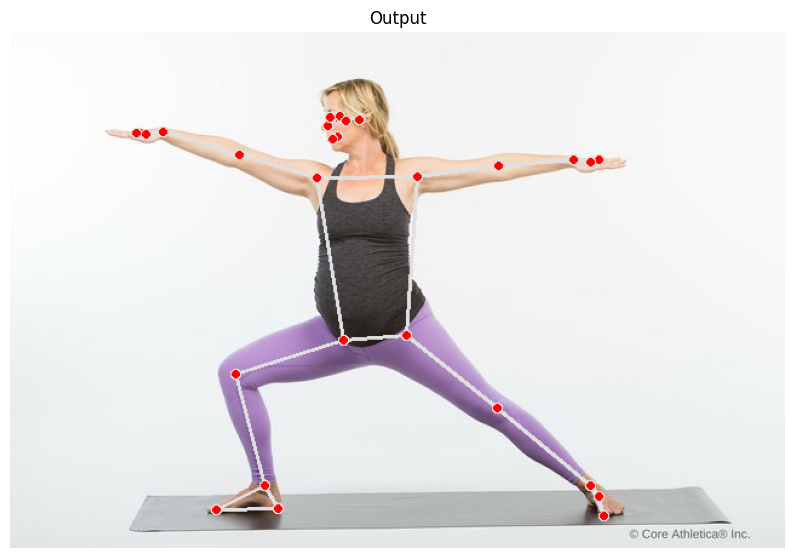

In [6]:
# 랜드마크를 그릴 사진을 COPY한다.
img_copy = sample_img.copy()
 
# 랜드마크를 찾는다.
if results.pose_landmarks:
    
    # sample image에 landmark를 그린다.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # figure의 크기를 설정한다.
    fig = plt.figure(figsize = [10, 10])
 
    # landmark가 draw된 image를 보여주기 전에 BGR TO RGB를 위해 copy_image의 순서를 반대로 변형해준다. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()
    

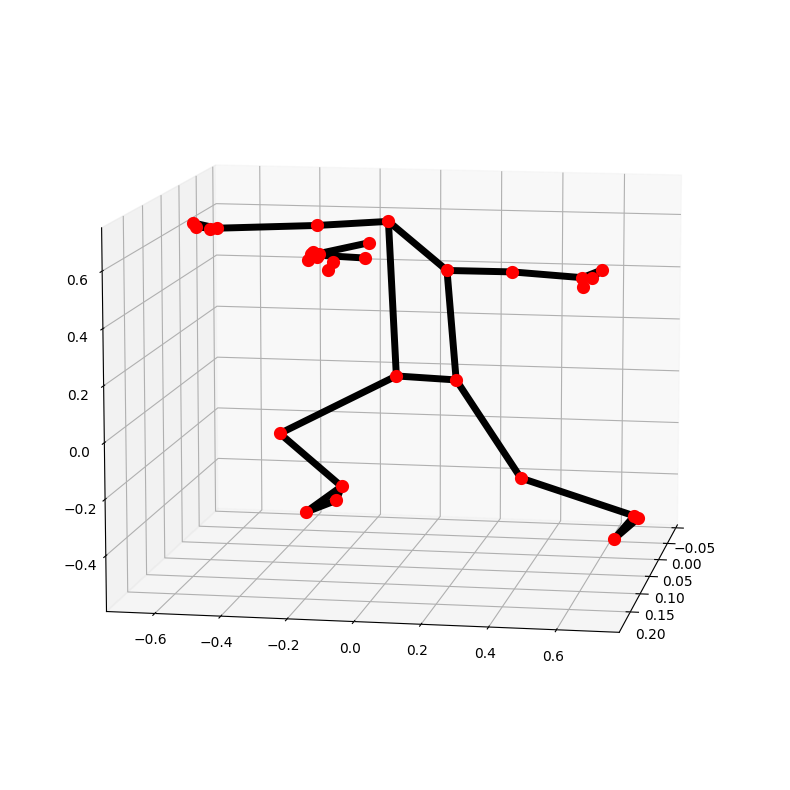

In [7]:
# 3차원으로 pose의 landmark의 위치를 확인
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

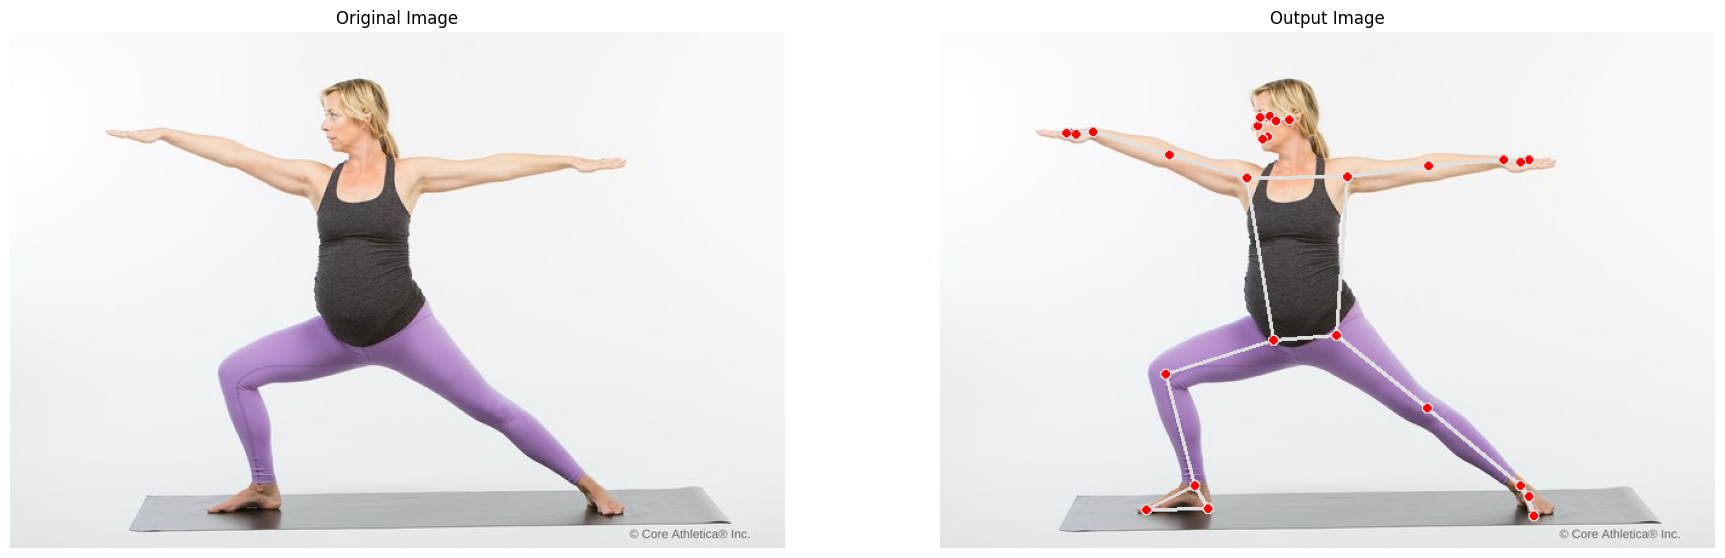

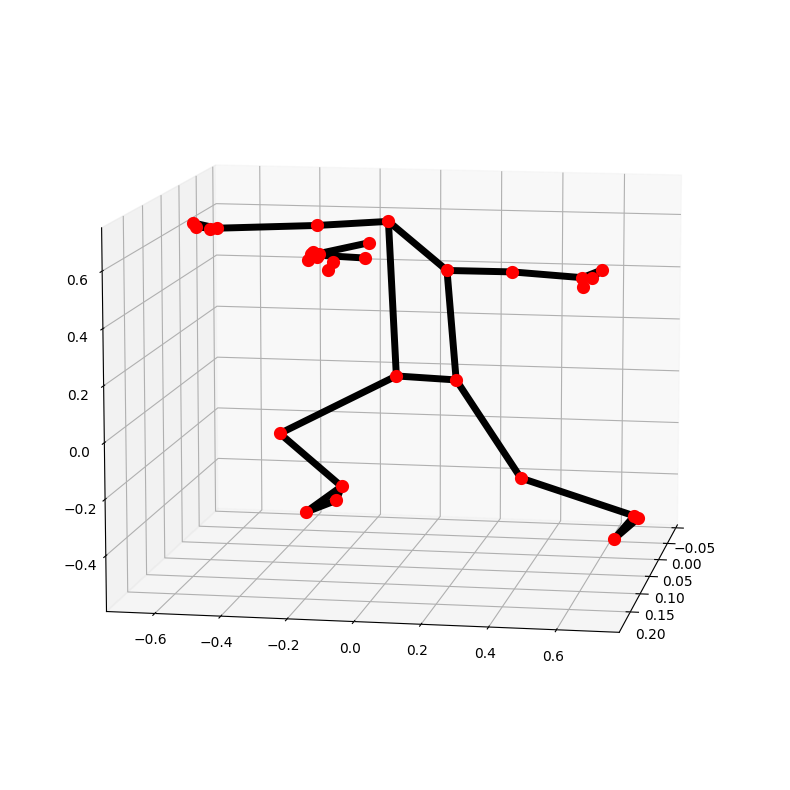

In [8]:
def detectPose(image, pose, display=True):

    # 예시이미지 copy하기
    output_image = image.copy()

    # 컬러 이미지 BGR TO RGB 변환
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # pose detection 수행
    results = pose.process(imageRGB)

    # input image의 너비&높이 탐색
    height, width, _ = image.shape

    # detection landmarks를 저장할 빈 list 초기화
    landmarks = []

    # landmark가 감지 되었는지 확인
    if results.pose_landmarks:

      # landmark 그리기
      mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

      # 감지된 landmark 반복
      for landmark in results.pose_landmarks.landmark:

        # landmark를 list에 추가하기
        landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))

    # 오리지널 image와 pose detect된 image 비교
    if display:

      # 오리지널 & 아웃풋 이미지 그리기
      plt.figure(figsize=[22,22])
      plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
      plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

      # 3D 랜드마크 나타내기
      mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # 그렇지 않다면, output_image 와 landmark return한다
    else:

      return output_image, landmarks
# pose detection function start

image = cv2.imread('/Users/baekseung-yun/Desktop/video/yoga13.jpg')
detectPose(image, pose, display=True)

In [9]:
import math

# 앵글 계산 함수
def calculateAngle(landmark1, landmark2, landmark3):

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle
    
# 함수 실행
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [10]:
import cv2
import math
import mediapipe as mp

# Angle calculation function
def calculateAngle(landmark1, landmark2, landmark3):
    # Calculate the angle between three points in 2D.
    x1, y1 = landmark1.x, landmark1.y
    x2, y2 = landmark2.x, landmark2.y
    x3, y3 = landmark3.x, landmark3.y

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    if angle < 0:
        angle += 360

    return angle

# Pose classification and correction function
def classifyAndCorrectPose(landmarks, output_image):
    label = 'Unknown Pose'
    corrections = []

    mp_pose = mp.solutions.pose

    # Calculate angles for elbows, knees, and shoulders
    left_elbow_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
        landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
        landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])

    right_elbow_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])

    left_knee_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
        landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
        landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    right_knee_angle = calculateAngle(
        landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
        landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

    # T Pose check and corrections
    if all(160 <= angle <= 180 for angle in [left_elbow_angle, right_elbow_angle]):
        label = 'T Pose'
        if not all(175 <= angle <= 180 for angle in [left_elbow_angle, right_elbow_angle]):
            corrections.append("Extend your arms fully")

    # Warrior II Pose check and corrections
    if left_knee_angle > 160 and right_knee_angle < 160:
        label = 'Tree Pose'
        corrections.append("Adjust the position of your left leg for better balance")


    # Tree Pose check and corrections
    if right_knee_angle > 160:  # Assuming right leg is the standing leg
        if not (160 < left_knee_angle < 200 or 0 <= left_knee_angle <= 20):  # Check for the positioning of the non-standing leg
            label = 'Warrior II Pose'
            if not 160 < left_knee_angle < 180:
                corrections.append("Straighten the left leg more")
            if not 90 < right_knee_angle < 160:
                corrections.append("Bend the right knee more")
            
    # Apply corrections and label to image
    corrections = [correction for correction in corrections if correction]  # Remove empty strings
    color = (0, 255, 0) if not corrections else (0, 0, 255)  # Green if correct, red for corrections
    label_y_position = 20  # 기존 label 위치
    cv2.putText(output_image, label, (10, label_y_position), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    correction_start_y_position = 50  # 첫 번째 correction 메시지의 시작 y 위치를 조정
    correction_gap = 30  # 각 correction 메시지 사이의 간격을 조정

    for i, correction in enumerate(corrections):
        y_position = correction_start_y_position + (i * correction_gap)  # 각 correction 메시지의 y 위치를 계산
        cv2.putText(output_image, correction, (10, y_position), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

    return output_image, label, corrections

In [11]:
import cv2
import mediapipe as mp

# Setup Pose function for video.
mp_pose = mp.solutions.pose  # 이 부분이 누락되었을 수 있으니, 확인하고 추가하세요.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        continue  # Continue to the next iteration to read the next frame.

    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Perform Pose landmark detection.
    results = pose_video.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Check if landmarks are detected.
    if results.pose_landmarks:
        # Extract landmarks
        landmarks = [landmark for landmark in results.pose_landmarks.landmark]
        # Perform the Pose Classification and Correction.
        frame, label, corrections = classifyAndCorrectPose(landmarks, frame)  # display=False 를 제거했습니다.
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if k == 27:
        break  # Break the loop.

# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()


2024-02-03 07:21:30.006 Python[1242:57036] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
